In [25]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [36]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:

session = Session(engine)


In [42]:
prev_year = dt.date(2017, 8, 23)

In [43]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


In [44]:
results = []

In [46]:
results = session.query(Measurement.date, Measurement.prcp)


In [47]:
df = pd.DataFrame(results, columns=['date','precipitation'])


In [48]:
df = df.sort_index()


<AxesSubplot:>

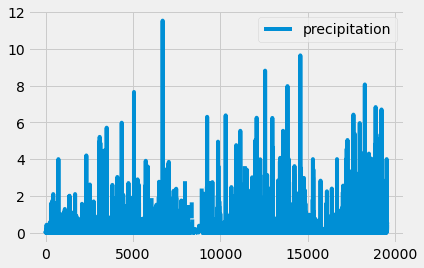

In [49]:
df.plot()

In [50]:
df.describe()


,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [56]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [60]:
session.query(Measurement.tobs)

In [61]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

In [63]:
df = pd.DataFrame(results, columns=['tabs'])

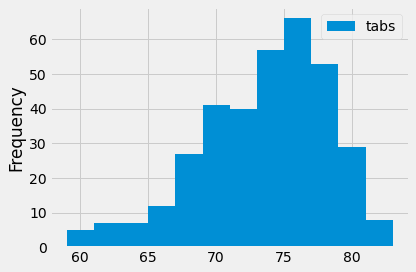

In [66]:
df.plot.hist(bins=12)
plt.tight_layout()


<Figure size 432x288 with 0 Axes>